# 個股預測--Google

嘗試預測Google的價格走勢。我們使用2004/8/19至2019/6/4的每日股價

# 資料讀入
資料取自 [Yahoo finance](https://finance.yahoo.com/quote/GOOGL/history?period1=1092844800&period2=1559491200&interval=1d&filter=history&frequency=1d)

In [1]:
import pandas as pd
df= pd.read_csv('GOOG.csv')

In [2]:
df

,Date,Open,Low,High,Volume,Close
0,2004/8/19,49.676899,47.669952,51.693783,44994500,49.845802
1,2004/8/20,50.178635,49.925285,54.187561,23005800,53.805050
2,2004/8/23,55.017166,54.172661,56.373344,18393200,54.346527
3,2004/8/24,55.260582,51.450363,55.439419,15361800,52.096165
4,2004/8/25,52.140873,51.604362,53.651051,9257400,52.657513
5,2004/8/26,52.135906,51.991844,53.626213,7148200,53.606342
6,2004/8/27,53.700729,52.503513,53.959049,6258300,52.732029
7,2004/8/30,52.299839,50.675404,52.404160,5235700,50.675404
8,2004/8/31,50.819469,50.749920,51.519913,4954800,50.854240
9,2004/9/1,51.018177,49.512966,51.152302,9206800,49.801090


# 資料正規化

使用sklearn裡的MinMaxScaler做資料的正規化

In [3]:
from sklearn import preprocessing

def normalize(df):
    newdf= df.copy()
    newdf=newdf.drop(["Date"], axis=1)
    min_max_scaler = preprocessing.MinMaxScaler()
    newdf['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    newdf['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    newdf['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    newdf['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    newdf['Close'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1,1))

    return newdf

df_norm= normalize(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# 資料編輯

In [4]:
import numpy as np

def data_helper(df, time_frame):
    
    # 資料維度: 開盤價、收盤價、最高價、最低價、成交量, 5維
    number_features = len(df.columns)

    # 將dataframe 轉成 numpy array
    datavalue = df.as_matrix()

    result = []
    # 若想要觀察的 time_frame 為3天, 需要多加一天做為驗證答案
    for index in range( len(datavalue) - (time_frame+1) ): # 從 datavalue 的第0個跑到倒數第 time_frame+1 個
        result.append(datavalue[index: index + (time_frame+1) ]) # 逐筆取出 time_frame+1 個K棒數值做為一筆 instance
    
    result = np.array(result)
    number_train = round(0.9 * result.shape[0]) # 取 result 的前90% instance做為訓練資料
    
    x_train = result[:int(number_train), :-1] # 訓練資料中, 只取每一個 time_frame 中除了最後一筆的所有資料做為feature
    y_train = result[:int(number_train), -1][:,-1]
    # 訓練資料中, 取每一個 time_frame 中最後一筆資料的最後一個數值(收盤價)做為答案
    
    # 測試資料
    x_test = result[int(number_train):, :-1]
    y_test = result[int(number_train):, -1][:,-1]
    
    # 將資料組成變好看一點
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], number_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], number_features))  

    return [x_train, y_train, x_test, y_test]

# 以3天為一區間進行股價預測
X_train, y_train, X_test, y_test = data_helper(df_norm, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [5]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(3346, 3, 5) (3346,) (372, 3, 5) (372,)


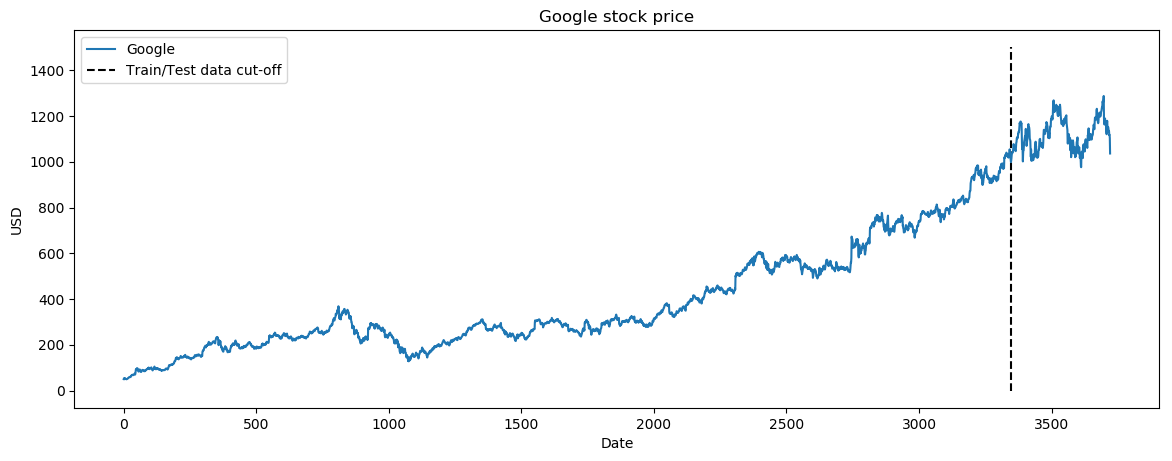

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df.Close.values, label='Google')
plt.vlines(X_train.shape[0], 0, 1500, linestyles='--', colors='black', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Google stock price')
plt.legend(loc='upper left')
plt.show()

為了要讓樣本盡可能的接近現實的機率分布，所以做隨機打亂，一定程度上也能表現出不同的機率分布。

In [7]:
def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]
X_train, y_train = shuffle(X_train, y_train)

# Keras 模型建立

比較多種模型，找出適合用來預測的模型
* LSTM
* CNN
* CNN+LSTM

為了能客觀比較，盡量讓隱藏層的結構相似，也刻意使用相同的loss和optimizer。

## LSTM

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import keras

def build_model(input_length, input_dim):
    model = Sequential()
    
    model.add(LSTM(128, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(LSTM(512, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(LSTM(1024, input_shape=(input_length, input_dim), return_sequences=False))

    model.add(Dense(16,kernel_initializer='lecun_uniform',activation='selu'))
    model.add(Dense(1,kernel_initializer='lecun_uniform',activation='selu'))

    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

    return model

# 20天、5維
model = build_model(3,5)
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 128)            68608     
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 256)            394240    
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 512)            1574912   
_________________________________________________________________
lstm_4 (LSTM)                (None, 1024)              6295552   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                16400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 8,349,729
Trainable params: 8,349,729
Non-trainable para

## CNN

In [9]:
from keras.layers import Convolution1D,MaxPooling1D,Flatten
def build_model_cnn(input_length, input_dim):
    model = Sequential()

    model.add(Convolution1D(128,kernel_size=2, padding = 'same',input_shape=(input_length, input_dim)))
    model.add(Convolution1D(256,kernel_size=2, padding = 'same',input_shape=(input_length, input_dim)))
    model.add(Convolution1D(512,kernel_size=2, padding = 'same',input_shape=(input_length, input_dim)))
    model.add(Convolution1D(1024,kernel_size=2, padding = 'same',input_shape=(input_length, input_dim)))
    
    model.add(Flatten())
    
    model.add(Dense(16,kernel_initializer='lecun_uniform',activation='selu'))
    model.add(Dense(1,kernel_initializer='lecun_uniform',activation='selu'))

    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

    return model
model_cnn = build_model_cnn(3,5)
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3, 128)            1408      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 256)            65792     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 512)            262656    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3, 1024)           1049600   
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                49168     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total para

## CNN+LSTM

In [10]:
def build_model_cnnlstm(input_length, input_dim):
    model = Sequential()

    model.add(Convolution1D(128,kernel_size=2, padding = 'same',input_shape=(input_length, input_dim)))
    model.add(Convolution1D(256,kernel_size=2, padding = 'same',input_shape=(input_length, input_dim)))
    model.add(LSTM(512, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(LSTM(1024, input_shape=(input_length, input_dim), return_sequences=True))

    model.add(Flatten())
    
    model.add(Dense(16,kernel_initializer='lecun_uniform',activation='selu'))
    model.add(Dense(1,kernel_initializer='lecun_uniform',activation='selu'))

    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

    return model
model_cnnlstm = build_model_cnnlstm(3,5)
model_cnnlstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 3, 128)            1408      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 3, 256)            65792     
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 512)            1574912   
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 1024)           6295552   
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                49168     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total para

# 模型訓練
訓練時加入EarlyStopping，避免overfitting

## LSTM

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
model_hostory=model.fit(X_train,y_train,batch_size=512,epochs=200,validation_split=0.1,verbose=1,callbacks=[callback])

Instructions for updating:
Use tf.cast instead.
Train on 3011 samples, validate on 335 samples
Epoch 1/200
3011/3011 [==============================] - 12s 4ms/step - loss: 0.0591 - acc: 3.3212e-04 - val_loss: 0.0187 - val_acc: 0.0000e+00
Epoch 2/200
3011/3011 [==============================] - 6s 2ms/step - loss: 0.0212 - acc: 3.3212e-04 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 3/200
3011/3011 [==============================] - 6s 2ms/step - loss: 0.0066 - acc: 3.3212e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 4/200
3011/3011 [==============================] - 6s 2ms/step - loss: 0.0034 - acc: 3.3212e-04 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 5/200
3011/3011 [==============================] - 6s 2ms/step - loss: 0.0022 - acc: 3.3212e-04 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 6/200
3011/3011 [==============================] - 6s 2ms/step - loss: 0.0012 - acc: 3.3212e-04 - val_loss: 7.9808e-04 - val_acc: 0.0000e+00
Epoch 7/200
3011/3011 [===================

## CNN

In [12]:
model_cnn_hostory=model_cnn.fit(X_train,y_train,batch_size=512,epochs=200,validation_split=0.1,verbose=1,callbacks=[callback])

Train on 3011 samples, validate on 335 samples
Epoch 1/200
3011/3011 [==============================] - 5s 2ms/step - loss: 0.6085 - acc: 3.3212e-04 - val_loss: 0.0193 - val_acc: 0.0000e+00
Epoch 2/200
3011/3011 [==============================] - 4s 1ms/step - loss: 0.0299 - acc: 3.3212e-04 - val_loss: 0.0638 - val_acc: 0.0000e+00
Epoch 3/200
3011/3011 [==============================] - 4s 1ms/step - loss: 0.0394 - acc: 3.3212e-04 - val_loss: 0.0414 - val_acc: 0.0000e+00
Epoch 4/200
3011/3011 [==============================] - 4s 1ms/step - loss: 0.0180 - acc: 3.3212e-04 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 5/200
3011/3011 [==============================] - 4s 1ms/step - loss: 0.0079 - acc: 3.3212e-04 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 6/200
3011/3011 [==============================] - 3s 1ms/step - loss: 0.0037 - acc: 3.3212e-04 - val_loss: 0.0050 - val_acc: 0.0000e+00
Epoch 7/200
3011/3011 [==============================] - 3s 1ms/step - loss: 0.0026 - acc: 3.32

3011/3011 [==============================] - 4s 1ms/step - loss: 3.9236e-05 - acc: 3.3212e-04 - val_loss: 2.9182e-05 - val_acc: 0.0000e+00
Epoch 56/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.8188e-05 - acc: 3.3212e-04 - val_loss: 2.8743e-05 - val_acc: 0.0000e+00
Epoch 57/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.7765e-05 - acc: 3.3212e-04 - val_loss: 3.0691e-05 - val_acc: 0.0000e+00
Epoch 58/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.8047e-05 - acc: 3.3212e-04 - val_loss: 2.8269e-05 - val_acc: 0.0000e+00
Epoch 59/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.7584e-05 - acc: 3.3212e-04 - val_loss: 2.8006e-05 - val_acc: 0.0000e+00
Epoch 60/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.7080e-05 - acc: 3.3212e-04 - val_loss: 2.8043e-05 - val_acc: 0.0000e+00
Epoch 61/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.6654e-05 - acc: 3.321

Epoch 109/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.1829e-05 - acc: 3.3212e-04 - val_loss: 2.2459e-05 - val_acc: 0.0000e+00
Epoch 110/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.1364e-05 - acc: 3.3212e-04 - val_loss: 2.2030e-05 - val_acc: 0.0000e+00
Epoch 111/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.1946e-05 - acc: 3.3212e-04 - val_loss: 2.2312e-05 - val_acc: 0.0000e+00
Epoch 112/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.1706e-05 - acc: 3.3212e-04 - val_loss: 2.2163e-05 - val_acc: 0.0000e+00
Epoch 113/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.1371e-05 - acc: 3.3212e-04 - val_loss: 2.2093e-05 - val_acc: 0.0000e+00
Epoch 114/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.1717e-05 - acc: 3.3212e-04 - val_loss: 2.1890e-05 - val_acc: 0.0000e+00
Epoch 115/200
3011/3011 [==============================] - 4s 1ms/step - loss: 3.2

## CNN+LSTM

In [13]:
model_cnnlstm_hostory=model_cnnlstm.fit(X_train,y_train,batch_size=512,epochs=200,validation_split=0.1,verbose=1,callbacks=[callback])

Train on 3011 samples, validate on 335 samples
Epoch 1/200
3011/3011 [==============================] - 12s 4ms/step - loss: 0.0334 - acc: 3.3212e-04 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 2/200
3011/3011 [==============================] - 7s 2ms/step - loss: 0.0046 - acc: 3.3212e-04 - val_loss: 0.0065 - val_acc: 0.0000e+00
Epoch 3/200
3011/3011 [==============================] - 8s 3ms/step - loss: 0.0032 - acc: 3.3212e-04 - val_loss: 5.5452e-04 - val_acc: 0.0000e+00
Epoch 4/200
3011/3011 [==============================] - 7s 2ms/step - loss: 0.0014 - acc: 3.3212e-04 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 5/200
3011/3011 [==============================] - 7s 2ms/step - loss: 0.0010 - acc: 3.3212e-04 - val_loss: 2.3514e-04 - val_acc: 0.0000e+00
Epoch 6/200
3011/3011 [==============================] - 8s 3ms/step - loss: 3.5160e-04 - acc: 3.3212e-04 - val_loss: 5.1459e-04 - val_acc: 0.0000e+00
Epoch 7/200
3011/3011 [==============================] - 7s 2ms/step - loss: 2

Epoch 55/200
3011/3011 [==============================] - 5s 2ms/step - loss: 4.7315e-05 - acc: 3.3212e-04 - val_loss: 3.9907e-05 - val_acc: 0.0000e+00
Epoch 00055: early stopping


## LOSS值之紀錄

查看loss的走勢檢查是否有overfitting的產生

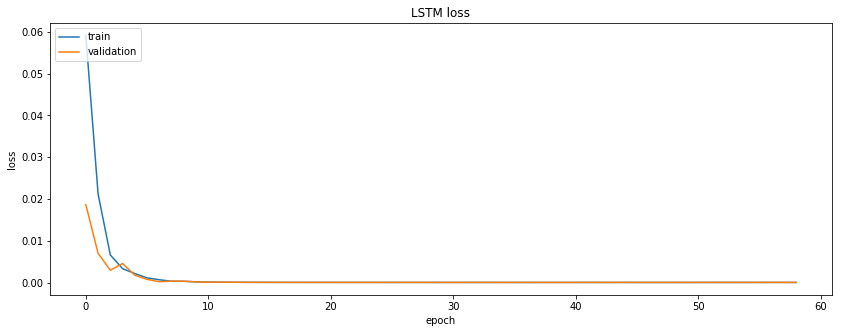

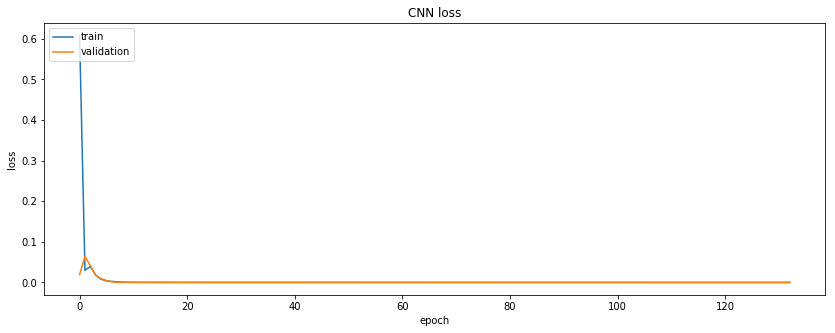

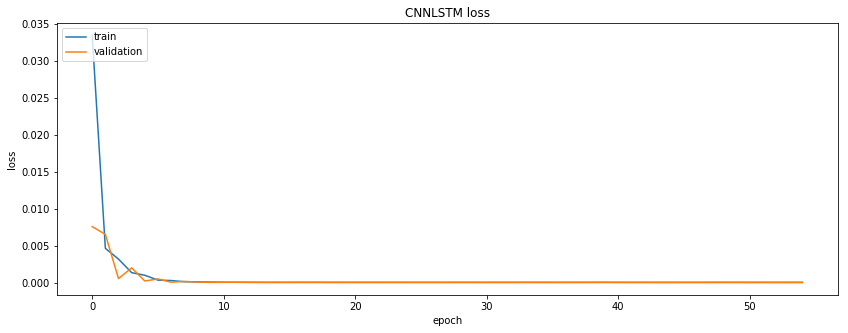

In [14]:
plt.figure(figsize=(14, 5))
loss = np.asarray(model_hostory.history["loss"])
lossv = np.asarray(model_hostory.history["val_loss"])

plt.plot(loss)
plt.plot(lossv)
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(14, 5))
lossc = np.asarray(model_cnn_hostory.history["loss"])
lossvc = np.asarray(model_cnn_hostory.history["val_loss"])

plt.plot(lossc)
plt.plot(lossvc)
plt.title('CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(14, 5))
losscl = np.asarray(model_cnnlstm_hostory.history["loss"])
lossvcl = np.asarray(model_cnnlstm_hostory.history["val_loss"])

plt.plot(losscl)
plt.plot(lossvcl)
plt.title('CNNLSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 預測及數值還原

In [15]:
def denormalize(df, norm_value):
    original_value = df['Close'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    
    return denorm_value

# 用訓練好的 LSTM 模型對測試資料集進行預測
pred = model.predict(X_test)
pred_cnn = model_cnn.predict(X_test)
pred_cnnlstm = model_cnnlstm.predict(X_test)

# 將預測值與正確答案還原回原來的區間值
denorm_pred = denormalize(df, pred)
denorm_pred_cnn = denormalize(df, pred_cnn)
denorm_pred_cnnlstm = denormalize(df, pred_cnnlstm)

denorm_ytest = denormalize(df, y_test)

# 股價預測結果

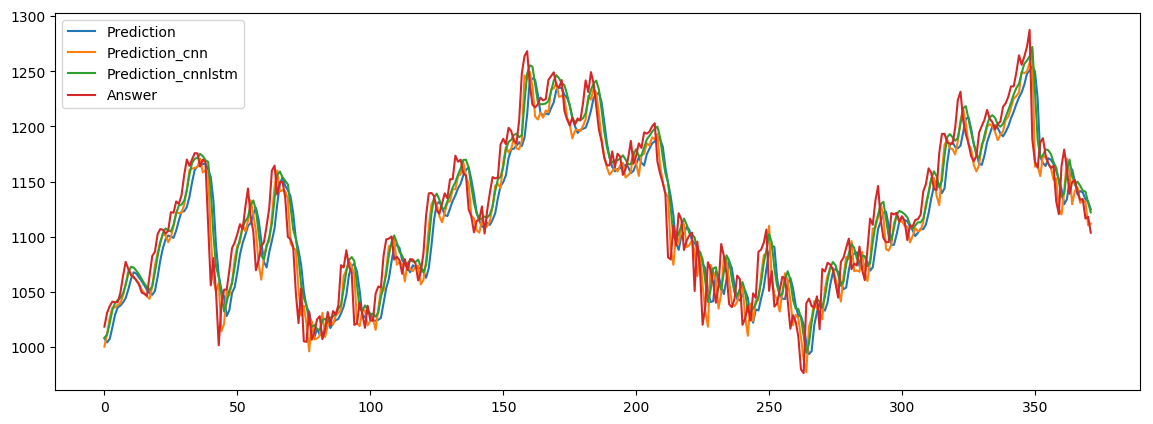

In [16]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(denorm_pred,label='Prediction')
plt.plot(denorm_pred_cnn,label='Prediction_cnn')
plt.plot(denorm_pred_cnnlstm,label='Prediction_cnnlstm')
plt.plot(denorm_ytest,label='Answer')
plt.legend(loc='best')
plt.show()

# 模型比較

In [17]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
score = model.evaluate(X_test, y_test)
score_cnn = model_cnn.evaluate(X_test, y_test)
score_cnnlstm = model_cnnlstm.evaluate(X_test, y_test)


print("loss")
print('LSTM   ', score[0])
print('CNN    ', score_cnn[0])
print('CNNLSTM', score_cnnlstm[0])

print("accuracy")
print('LSTM   ', score[1])
print('CNN    ', score_cnn[1])
print('CNNLSTM', score_cnnlstm[1])

print('mse')
print("LSTM   ",mean_squared_error(y_test,pred))
print('CNN    ',mean_squared_error(y_test,pred_cnn))
print('CNNLSTM',mean_squared_error(y_test,pred_cnnlstm))

print('mae')
print("LSTM   ",mean_absolute_error(y_test,pred))
print('CNN    ',mean_absolute_error(y_test,pred_cnn))
print('CNNLSTM',mean_absolute_error(y_test,pred_cnnlstm))

print('r2')
print("LSTM   ",r2_score(y_test,pred))
print('CNN    ',r2_score(y_test,pred_cnn))
print('CNNLSTM',r2_score(y_test,pred_cnnlstm))

372/372 [==============================] - 1s 2ms/step
loss
LSTM    0.0005082810264436268
CNN     0.00025996498848682127
CNNLSTM 0.00031948133349238387
accuracy
LSTM    0.002688172043010753
CNN     0.002688172043010753
CNNLSTM 0.002688172043010753
mse
LSTM    0.000508281041056736
CNN     0.00025996498748255363
CNNLSTM 0.0003194813391505496
mae
LSTM    0.018093003974848126
CNN     0.01247142928344407
CNNLSTM 0.013800430162164323
r2
LSTM    0.8257491644212412
CNN     0.9108778163437339
CNNLSTM 0.8904741947819572


# 模型選擇結果

#### CNN在各個統計指標和LOSS值都是最小的，而且整體趨勢也和現實較為貼合，故以CNN作為後續預測用的模型

# 特徵增加

##  增加部分特徵希望能表達市場環境
抓取美國各大ETF和重要的期貨價格，以及美國與各大國的匯率，競爭企業

資料來源:[investing](https://www.investing.com/)

In [18]:
market= pd.read_csv('market.csv')
market

,Closevix,Closedji,Closetnx,Closerut,Closen225,Closeixic,Closegspc,Opengold,Openjp,Openeur,Opengbp,Openoil,Opensilver,Openrmb,Opentw,Closeamz,Closemsft,Closeappl,Closeneflx
0,16.959999,10040.82,4.23,537.44,11744.15,1819.89,1091.23,48.80,105.52,1.32,1.88,48.80,13.55,8.2765,31.496,38.630001,27.120001,2.193571,2.264286
1,16.000000,10110.14,4.21,547.92,11780.40,1838.02,1098.35,48.48,105.81,1.32,1.87,48.48,13.90,8.2765,31.695,39.509998,27.200001,2.200000,2.262857
2,15.880000,10073.05,4.23,543.47,11884.06,1838.70,1095.68,48.84,106.85,1.32,1.86,48.84,14.19,8.2765,31.887,39.450001,27.240000,2.220000,2.272857
3,15.330000,10098.63,4.28,545.01,11860.81,1836.89,1096.19,49.40,107.31,1.32,1.85,49.40,14.10,8.2765,31.704,39.049999,27.240000,2.282143,2.208571
4,14.980000,10181.74,4.28,550.14,11858.87,1860.72,1104.96,49.65,106.85,1.31,1.84,49.65,13.70,8.2765,31.546,40.299999,27.549999,2.360714,2.238571
5,14.910000,10173.41,4.26,547.25,11896.01,1852.92,1105.09,49.07,107.41,1.31,1.84,49.07,13.53,8.2765,31.413,40.189999,27.440001,2.475714,2.177143
6,14.710000,10195.01,4.23,551.67,11721.49,1862.09,1107.77,45.49,107.01,1.32,1.84,45.49,13.85,8.2765,31.593,39.900002,27.459999,2.453571,2.164286
7,15.440000,10122.52,4.23,544.56,11541.71,1836.49,1099.15,43.33,107.64,1.32,1.84,43.33,13.72,8.2765,31.649,38.310001,27.299999,2.437143,2.064286
8,15.290000,10173.92,4.19,547.93,11475.27,1838.10,1104.24,42.50,108.15,1.33,1.82,42.50,13.83,8.2765,31.603,38.139999,27.299999,2.463571,1.992857
9,14.910000,10168.46,4.13,552.46,11384.86,1850.41,1105.91,43.10,107.67,1.34,1.83,43.10,13.59,8.2765,31.599,38.240002,27.389999,2.561429,2.038571


## 技術指標
很多投資者都遵循技術指標。我們將最受歡迎的指標作為獨立特徵。如-7和21天移動平均線，指數移動平均線，momentum，布林線，MACD。

In [19]:
def get_tec_index(df):
    newdf= df.copy()
    # Create EMA7 & EMA21
    newdf['MA7']=df['Close'].rolling(window=7).mean()
    newdf['MA21']=df['Close'].rolling(window=21).mean()
    
    # Create MACD
    newdf['26ema'] = pd.DataFrame.ewm(df['Close'], span=26).mean()
    newdf['12ema'] = pd.DataFrame.ewm(df['Close'], span=12).mean()
    newdf['MACD'] = (newdf['12ema']-newdf['26ema'])

    # Create Bollinger Bands
    newdf['20sd'] = df['Close'].rolling(window=20).std()
    newdf['upper_band'] = newdf['MA21'] + (newdf['20sd']*2)
    newdf['lower_band'] = newdf['MA21'] - (newdf['20sd']*2)
    
    # Create Exponential moving average
    newdf['ema'] = df['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    newdf['momentum'] = df['Close']-1
    
    # Create log momentum
    newdf['log_momentum'] = np.log(newdf['momentum'])
    
    
    return newdf
df_tec=get_tec_index(df)
df_tecn=pd.concat([df_tec,market],axis=1)
df_tecn

,Date,Open,Low,High,Volume,Close,MA7,MA21,26ema,12ema,...,Openeur,Opengbp,Openoil,Opensilver,Openrmb,Opentw,Closeamz,Closemsft,Closeappl,Closeneflx
0,2004/8/19,49.676899,47.669952,51.693783,44994500,49.845802,NaN,NaN,49.845802,49.845802,...,1.32,1.88,48.80,13.55,8.2765,31.496,38.630001,27.120001,2.193571,2.264286
1,2004/8/20,50.178635,49.925285,54.187561,23005800,53.805050,NaN,NaN,51.901565,51.990395,...,1.32,1.87,48.48,13.90,8.2765,31.695,39.509998,27.200001,2.200000,2.262857
2,2004/8/23,55.017166,54.172661,56.373344,18393200,54.346527,NaN,NaN,52.780016,52.909994,...,1.32,1.86,48.84,14.19,8.2765,31.887,39.450001,27.240000,2.220000,2.272857
3,2004/8/24,55.260582,51.450363,55.439419,15361800,52.096165,NaN,NaN,52.588841,52.653100,...,1.32,1.85,49.40,14.10,8.2765,31.704,39.049999,27.240000,2.282143,2.208571
4,2004/8/25,52.140873,51.604362,53.651051,9257400,52.657513,NaN,NaN,52.604767,52.654299,...,1.31,1.84,49.65,13.70,8.2765,31.546,40.299999,27.549999,2.360714,2.238571
5,2004/8/26,52.135906,51.991844,53.626213,7148200,53.606342,NaN,NaN,52.805374,52.885695,...,1.31,1.84,49.07,13.53,8.2765,31.413,40.189999,27.440001,2.475714,2.177143
6,2004/8/27,53.700729,52.503513,53.959049,6258300,52.732029,52.727061,NaN,52.792330,52.851405,...,1.32,1.84,45.49,13.85,8.2765,31.593,39.900002,27.459999,2.453571,2.164286
7,2004/8/30,52.299839,50.675404,52.404160,5235700,50.675404,52.845576,NaN,52.451241,52.397307,...,1.32,1.84,43.33,13.72,8.2765,31.649,38.310001,27.299999,2.437143,2.064286
8,2004/8/31,50.819469,50.749920,51.519913,4954800,50.854240,52.424031,NaN,52.214530,52.092034,...,1.33,1.82,42.50,13.83,8.2765,31.603,38.139999,27.299999,2.463571,1.992857
9,2004/9/1,51.018177,49.512966,51.152302,9206800,49.801090,51.774683,NaN,51.881499,51.657901,...,1.34,1.83,43.10,13.59,8.2765,31.599,38.240002,27.389999,2.561429,2.038571


## 技術指標可視化

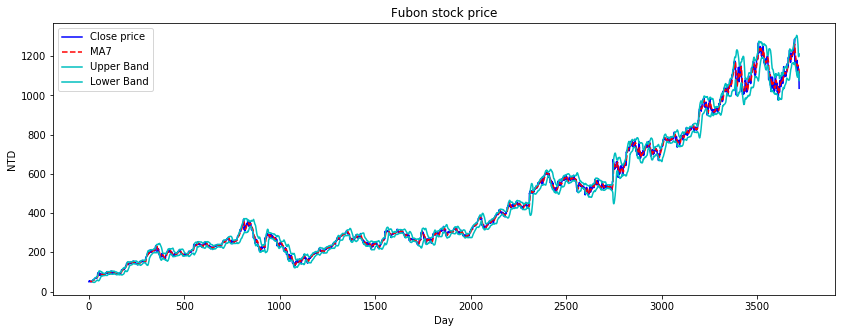

In [20]:
plt.figure(figsize=(14, 5))
plt.plot(df.Close.values, label='Close price', color='blue')
plt.plot(df_tec.MA7.values, label='MA7', linestyle='--', color='red')
plt.plot(df_tec.upper_band.values,label='Upper Band', color='c')
plt.plot(df_tec.lower_band.values,label='Lower Band', color='c')
#plt.vlines(3500, 0, 70, linestyles='--', colors='black', label='Train/Test data cut-off')
plt.xlabel('Day')
plt.ylabel('NTD')
plt.title('Fubon stock price')
plt.legend()
plt.show()

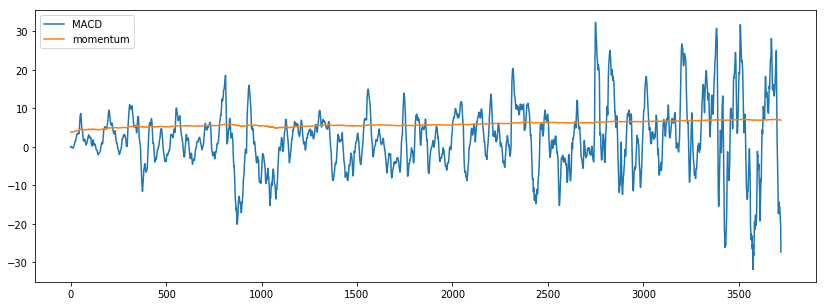

In [21]:
plt.figure(figsize=(14, 5))
plt.plot(df_tec.MACD.values ,label='MACD')
plt.plot(df_tec.log_momentum.values, label='momentum')
plt.legend()
plt.show()

# 特徵重要度分析
用Xgboost執行此分析，找出對google收盤價有影響力的特徵，來幫助模型訓練

In [22]:
import xgboost as xgb
def get_crucial_data(data):
    df_c = data.copy()
    df_c_close_price = df_c['Close']
    df_c_feature = df_c.iloc[:,6:df_tecn.shape[1]]
    
    # define the size of training and test data 
    train_data_size =  int(df_c_feature.shape[0]*0.8)
    test_data_size = df_c_feature.shape[0]-train_data_size
    
    # set the training data and testing data of close price
    df_c_close_train = df_c_close_price[0:train_data_size]
    df_c_close_test = df_c_close_price[train_data_size:df_c_feature.shape[0]]
    
    # set the training data and testing data of indexes
    df_c_feature_train = df_c_feature[0:train_data_size]
    df_c_feature_test = df_c_feature[train_data_size:df_c_feature.shape[0]]
    return (df_c_close_train,df_c_close_test),(df_c_feature_train,df_c_feature_test)

# extracting the training and testing data
(df_c_close_train,df_c_close_test),(df_c_feature_train,df_c_feature_test) = get_crucial_data(df_tecn)

regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(df_c_feature_train,df_c_close_train, 
                         eval_set = [(df_c_feature_train,df_c_close_train),(df_c_feature_test,df_c_close_test)], 
                         verbose=False)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:11:57] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

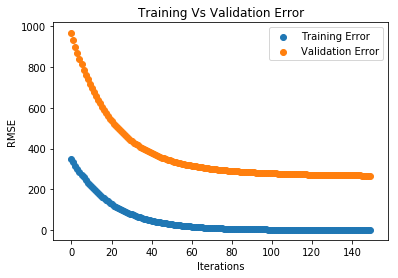

In [24]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Feature importance of the technical indicators.')

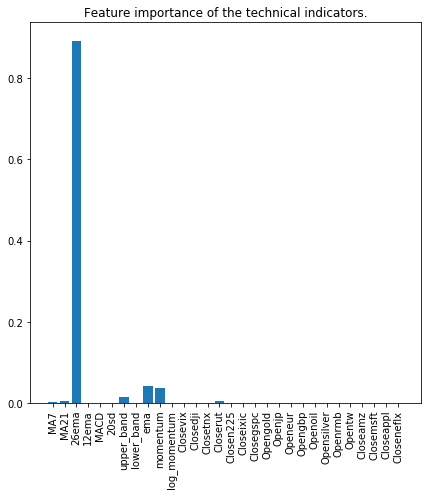

In [25]:
fig = plt.figure(figsize=(7,7))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=df_c_feature_test.columns)
plt.title('Feature importance of the technical indicators.')

### 經過特徵分析後，選擇加入26ema作為特徵

In [26]:
def get_normn_data(df):
    newdf= df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    newdf['Open'] = min_max_scaler.fit_transform(df_tecn.Open.values.reshape(-1,1))
    newdf['High'] = min_max_scaler.fit_transform(df_tecn.High.values.reshape(-1,1))
    newdf['Low'] = min_max_scaler.fit_transform(df_tecn.Low.values.reshape(-1,1))
    newdf['Close'] = min_max_scaler.fit_transform(df_tecn.Close.values.reshape(-1,1))    
    newdf['Volume'] = min_max_scaler.fit_transform(df_tecn.Volume.values.reshape(-1,1))
    newdf['26ema'] = min_max_scaler.fit_transform(df_tecn['26ema'].values.reshape(-1,1))
    newdf['ema'] = min_max_scaler.fit_transform(df_tecn['ema'].values.reshape(-1,1))
    newdf['momentum'] = min_max_scaler.fit_transform(df_tecn['momentum'].values.reshape(-1,1))
    return newdf 
normn_df = get_normn_data(df_tecn)
normn_df=normn_df[['Open','High','Low','Volume','26ema','Close']]
normn_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Open,High,Low,Volume,26ema,Close
0,0.000329,0.000930,0.000000,0.543578,0.000000,0.000132
1,0.000738,0.002944,0.001851,0.277886,0.001750,0.003331
2,0.004689,0.004708,0.005336,0.222151,0.002498,0.003768
3,0.004888,0.003954,0.003102,0.185523,0.002335,0.001950
4,0.002340,0.002510,0.003229,0.111763,0.002349,0.002404
5,0.002336,0.002490,0.003547,0.086277,0.002520,0.003170
6,0.003614,0.002759,0.003966,0.075524,0.002509,0.002464
7,0.002470,0.001504,0.002466,0.063168,0.002218,0.000803
8,0.001261,0.000790,0.002527,0.059774,0.002017,0.000947
9,0.001424,0.000493,0.001512,0.111151,0.001733,0.000096


# 再次進行資料編輯

In [27]:
def data_helper(df, time_frame):
    
    # 資料維度: 開盤價、收盤價、最高價、最低價、成交量, 5維
    number_features = len(df.columns)

    # 將dataframe 轉成 numpy array
    datavalue = df.as_matrix()

    result = []
    # 若想要觀察的 time_frame 為20天, 需要多加一天做為驗證答案
    for index in range( len(datavalue) - (time_frame+1) ): # 從 datavalue 的第0個跑到倒數第 time_frame+1 個
        result.append(datavalue[index: index + (time_frame+1) ]) # 逐筆取出 time_frame+1 個K棒數值做為一筆 instance
    
    result = np.array(result)
    number_train = round(0.9 * result.shape[0]) # 取 result 的前90% instance做為訓練資料
    
    x_trainn = result[:int(number_train), :-1] # 訓練資料中, 只取每一個 time_frame 中除了最後一筆的所有資料做為feature
    y_trainn = result[:int(number_train), -1][:,-1]
    # 訓練資料中, 取每一個 time_frame 中最後一筆資料的最後一個數值(收盤價)做為答案
    
    # 測試資料
    x_testn = result[int(number_train):, :-1]
    y_testn = result[int(number_train):, -1][:,-1]
    
    # 將資料組成變好看一點
    x_trainn = np.reshape(x_trainn, (x_trainn.shape[0], x_trainn.shape[1], number_features))
    x_testn = np.reshape(x_testn, (x_testn.shape[0], x_testn.shape[1], number_features))  

    return [x_trainn, y_trainn, x_testn, y_testn]

# 以20天為一區間進行股價預測
X_trainn, y_trainn, X_testn, y_testn = data_helper(normn_df, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [28]:
def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]
X_trainn, y_trainn = shuffle(X_trainn, y_trainn)

In [29]:
print(X_trainn.shape,y_trainn.shape,X_testn.shape,y_testn.shape)

(3346, 3, 6) (3346,) (372, 3, 6) (372,)


In [30]:
model_cnnnew = build_model_cnn(3,6)
model_cnnnew.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 3, 128)            1664      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 3, 256)            65792     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 3, 512)            262656    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 3, 1024)           1049600   
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                49168     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total para

In [31]:
model_cnnnew_hostory=model_cnnnew.fit(X_trainn,y_trainn,batch_size=128,epochs=100,validation_split=0.1,verbose=1,callbacks=[callback])

Train on 3011 samples, validate on 335 samples
Epoch 1/100
3011/3011 [==============================] - 5s 2ms/step - loss: 0.1281 - acc: 3.3212e-04 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 2/100
3011/3011 [==============================] - 4s 1ms/step - loss: 0.0029 - acc: 3.3212e-04 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 3/100
3011/3011 [==============================] - 4s 1ms/step - loss: 3.3938e-04 - acc: 3.3212e-04 - val_loss: 1.2718e-04 - val_acc: 0.0000e+00
Epoch 4/100
3011/3011 [==============================] - 4s 1ms/step - loss: 8.8938e-05 - acc: 3.3212e-04 - val_loss: 6.5821e-05 - val_acc: 0.0000e+00
Epoch 5/100
3011/3011 [==============================] - 4s 1ms/step - loss: 5.9369e-05 - acc: 3.3212e-04 - val_loss: 4.7655e-05 - val_acc: 0.0000e+00
Epoch 6/100
3011/3011 [==============================] - 4s 1ms/step - loss: 4.8578e-05 - acc: 3.3212e-04 - val_loss: 4.4178e-05 - val_acc: 0.0000e+00
Epoch 7/100
3011/3011 [==============================] - 4s 1ms

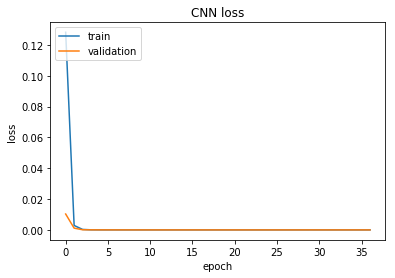

In [32]:
losscn = np.asarray(model_cnnnew_hostory.history["loss"])
lossvcn = np.asarray(model_cnnnew_hostory.history["val_loss"])

plt.plot(losscn)
plt.plot(lossvcn)
plt.title('CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
pred_cnnnew = model_cnnnew.predict(X_testn)
denorm_pred_cnnnew = denormalize(df, pred_cnnnew)

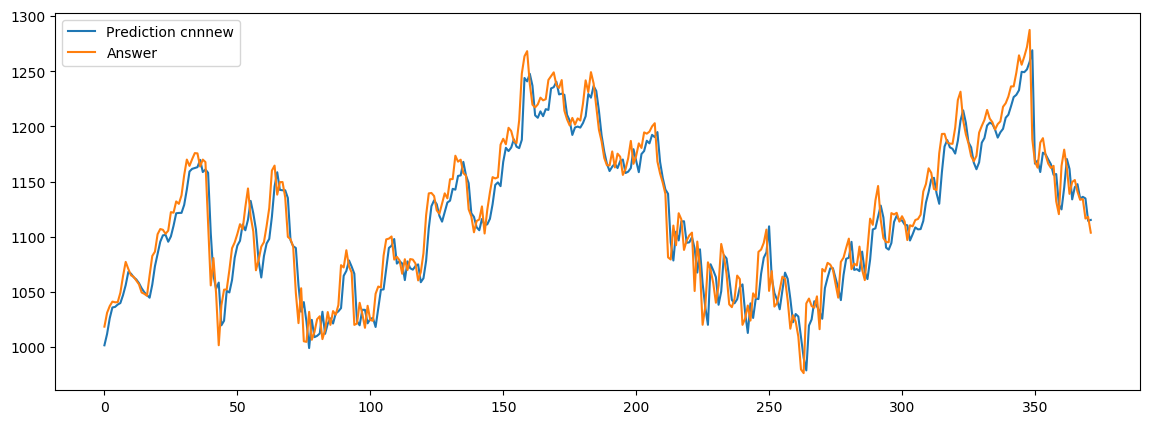

In [34]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(denorm_pred_cnnnew, label='Prediction cnnnew')

plt.plot(denorm_ytest, label='Answer')
plt.legend(loc='best')
plt.show()

In [35]:
score_cnnnew = model_cnnnew.evaluate(X_testn, y_testn)

print("loss")
print('CNN   ', score_cnn[0])
print('CNNNEW', score_cnnnew[0])


print("accuracy")
print('CNN   ', score_cnn[1])
print('CNNNEW', score_cnnnew[1])

print('mse')
print('CNN   ',mean_squared_error(y_test,pred_cnn))
print('CNNNEW',mean_squared_error(y_testn,pred_cnnnew))

print('mae')
print('CNN   ',mean_absolute_error(y_test,pred_cnn))
print('CNNNEW',mean_absolute_error(y_testn,pred_cnnnew))

print('r2')
print('CNN   ',r2_score(y_test,pred_cnn))
print('CNNNEW',r2_score(y_testn,pred_cnnnew))

372/372 [==============================] - 0s 164us/step
loss
CNN    0.00025996498848682127
CNNNEW 0.00024873627990018576
accuracy
CNN    0.002688172043010753
CNNNEW 0.002688172043010753
mse
CNN    0.00025996498748255363
CNNNEW 0.00024873627759959256
mae
CNN    0.01247142928344407
CNNNEW 0.012122597899509365
r2
CNN    0.9108778163437339
CNNNEW 0.9147272852822361


# 結論

### 本次期末專案得到以下結論:
1. 縮短選取的天數能使模型更好擬合，因為縮短天數能使輸入的資料量增加
2. 用CNN1D處理時間序列的資料時，kerel size=2能達到最好的效果
3. 做隨機打亂有助於擬合
4. 雖然增加了一些市場相關的資料，但經過分析後發現，公司本身的資訊相對來說更重要

### 增加特徵會讓結果更好一點點，但是似乎效果有限，另外精準度始終無法突破1%，代表這次期末專案的成果只能預測走勢，而無法精準到提供每日確切的收盤價，對炒短線的投資來說幫助有限，但若是投資時間若拉長到以月為單位，那麼這次專案的成果應該能當作重要的買賣點參考。

# 未來延伸
### 本次專案所找到的輸入資料還不能完全表達公司的所有情況，若能蒐集到更多資料，例如個股的EPS、本益比、新聞等等除了基本面外的資料，或許能訓練得更好，礙於許多公司資料的取得要與券商購買，所以本次所蒐集的資料僅有基本面相關。另外如同老師上課所提到的，之後延伸可以建構以LSTM為生成器，CNN1D為鑑別器的GAN，再近一步提升模型的擬合。

# 本專案參考來源

1.
https://towardsdatascience.com/aifortrading-2edd6fac689d?fbclid=IwAR3nsCYzd1qoIoiuxOXeZDHMB_DU03y7PyBq05MePNPw0ZaDHXGlCG92FU4

2.
https://medium.com/@daniel820710/%E5%88%A9%E7%94%A8keras%E5%BB%BA%E6%A7%8Blstm%E6%A8%A1%E5%9E%8B-%E4%BB%A5stock-prediction-%E7%82%BA%E4%BE%8B-1-67456e0a0b

3.
https://www.finlab.tw/%E7%94%A8%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E5%B9%AB%E4%BD%A0%E8%A7%A3%E6%9E%90K%E7%B7%9A%E5%9C%96%EF%BC%81/?fbclid=IwAR2JdWyIECCPzQ_Ejux9uolhsrjIaKN-_GvIM6W_k-D1id748kB8xJESnaE

# 參考論文
![參考論文](https://i1.rgstatic.net/publication/321503983_Stock_price_prediction_using_LSTM_RNN_and_CNN-sliding_window_model/links/5a51f808aca2725638c5ee3a/largepreview.png)